# Python для визуализации данных


# Мультивариативный график рассеяния (multivariate scatter plot): преступления в США

In [1]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году. 

In [2]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [3]:
crimes.shape

(50, 9)

In [4]:
crimes.describe()

,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,4.714000,33.800000,102.754000,260.350000,691.316000,2295.658000,362.834000,6.067118e+06
std,2.366347,11.379825,57.319795,132.656168,236.066567,516.879959,207.848335,6.748996e+06
min,1.100000,13.900000,7.400000,61.700000,311.900000,1343.700000,102.000000,5.326680e+05
25%,2.550000,26.125000,66.000000,150.750000,492.400000,1853.575000,214.975000,1.791191e+06
50%,4.700000,33.300000,95.400000,231.750000,665.150000,2353.150000,317.800000,4.340020e+06
75%,6.575000,40.250000,150.075000,353.675000,924.650000,2697.975000,419.075000,6.536963e+06
max,9.900000,81.100000,256.700000,579.000000,1201.100000,3308.400000,1115.200000,3.675667e+07


Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

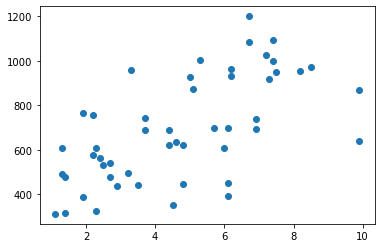

In [5]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary']);  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше. Дальше мы попробуем закодировать в нем еще две переменные. Есть идеи как?

Мульвариативный график - это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию - цыет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

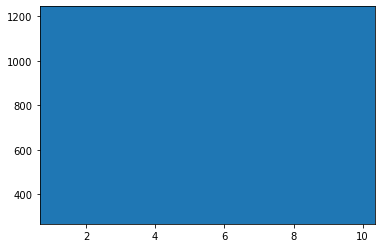

In [6]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

Воу! Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

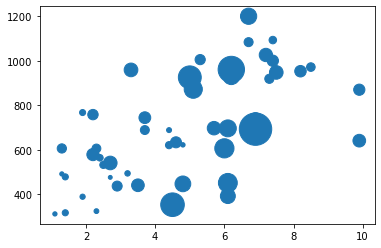

In [7]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

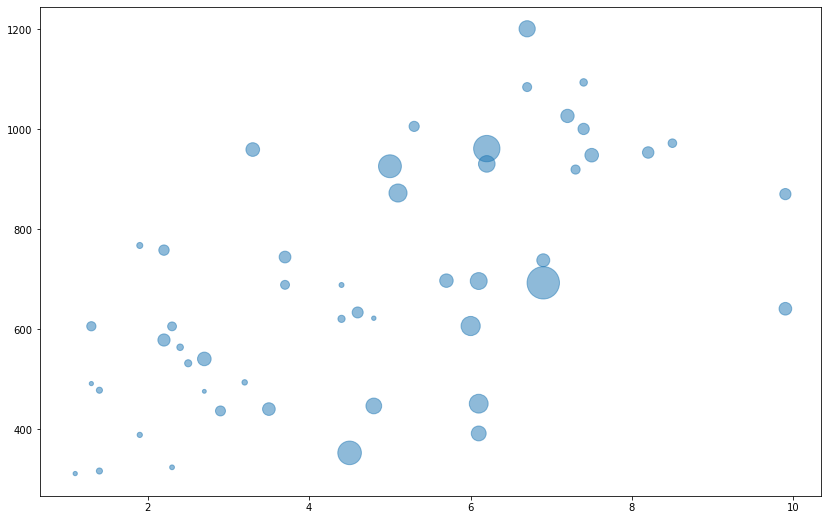

In [8]:
fig, ax = plt.subplots(figsize=(14,9))
ax.scatter(crimes['murder'],
           crimes['burglary'],
           s=crimes['population'] / 35000,
           alpha=0.5);  # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

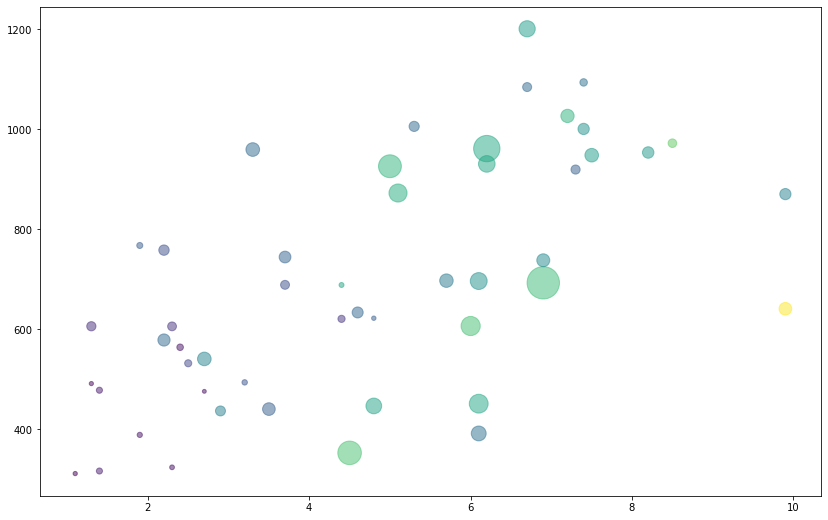

In [9]:
fig, ax = plt.subplots(figsize=(14,9))
ax.scatter(
    crimes['murder'],
    crimes['burglary'],
    s=crimes['population'] / 35000,
    alpha=0.5,
    c=crimes['Robbery']
);  # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые картыесть в matplotlib? Гуглим документацию!).

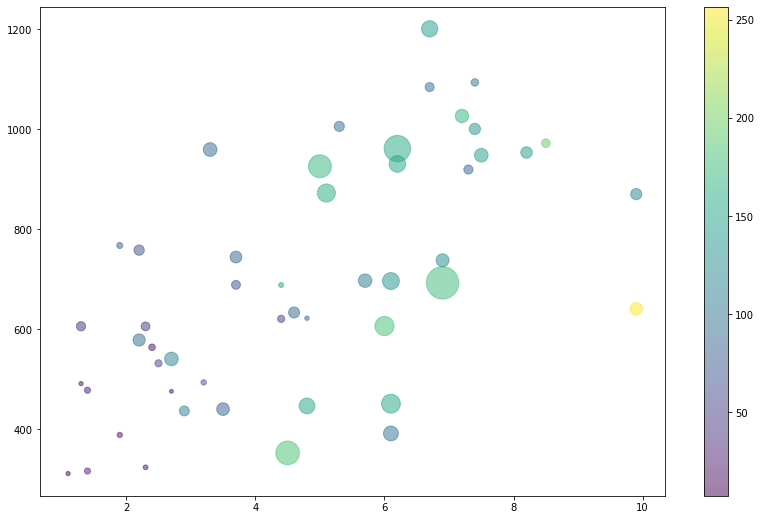

In [10]:
fig, ax = plt.subplots(figsize=(14,9))
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
                         cmap='viridis',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

Проинтерпретируем?

**Cделаем симпатичней и подпишем штаты**

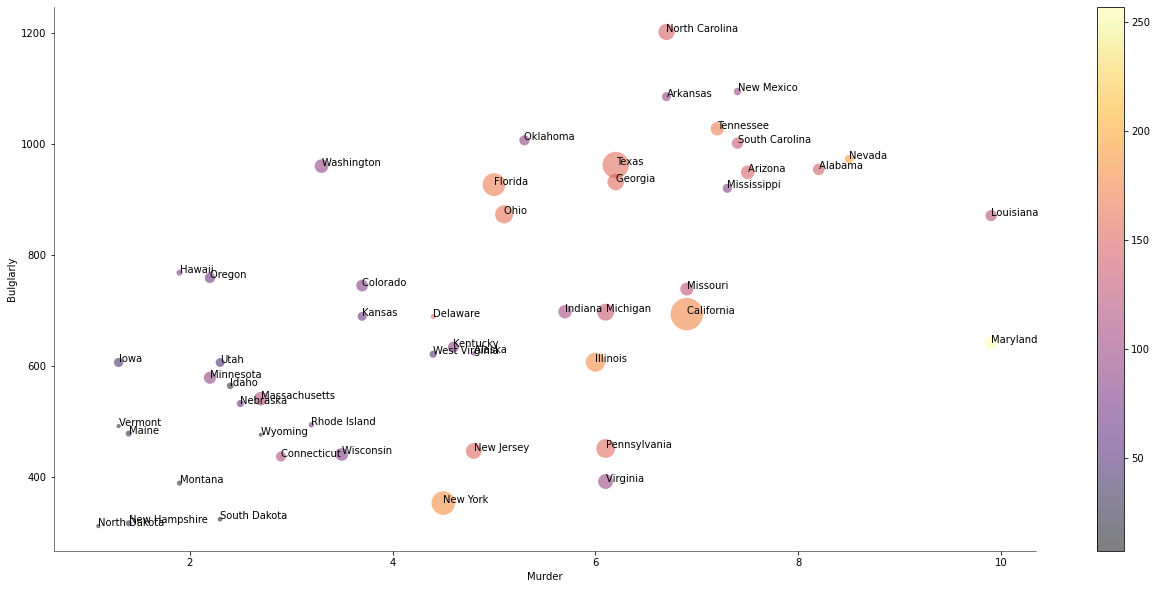

In [11]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         c=crimes['Robbery'],
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(
        crimes['state']
):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(
        state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10
    )  # используем метод annotate, которому говорим, что нужно брать имя штата
    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
    # ряду в датафрейме)

plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [19]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom